https://stackoverflow.com/questions/9008370/python-2d-contour-plot-from-3-lists-x-y-and-rho

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

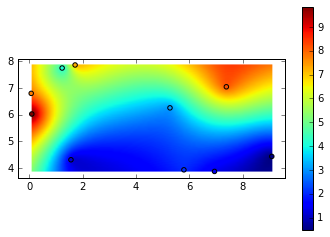

In [2]:
# Generate data:
x, y, z = 10 * np.random.random((3,10))

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()

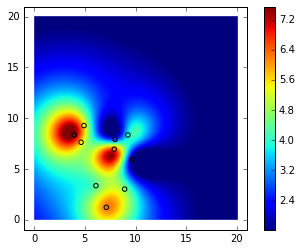

In [3]:
# Generate data:
x, y, z = 10 * np.random.random((3,10))

# Set up a regular grid of interpolation points
xi, yi = np.linspace(0, 20, 100), np.linspace(0, 20, 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[0, 20, 0, 20])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()

In [4]:
NX=160
NY=269
Xmeter=NX*50
Ymeter=NY*50
Xfeet=NX*50*3.28084
Yfeet=NY*50*3.28084
print (Xmeter, Ymeter, Xfeet, Yfeet)

8000 13450 26246.72 44127.298


In [5]:
XOFFSETf=34593.5206
YOFFSETf=119478.5687
XOFFSETm=XOFFSETf/3.28084
YOFFSETm=YOFFSETf/3.28084
theta=35

In [54]:
poro=pd.read_excel(r'log\poro.xlsx', 'poro')

In [59]:
poro=poro.assign(
    x0f=np.cos(-theta/360*2*np.pi)*(poro.x-XOFFSETf)+np.sin(-theta/360*2*np.pi)*(poro.y-YOFFSETf),
    y0f=-np.sin(-theta/360*2*np.pi)*(poro.x-XOFFSETf)+np.cos(-theta/360*2*np.pi)*(poro.y-YOFFSETf),
)
D1=poro[poro.z==1]
x=D1.x0f
y=D1.y0f
z=D1.poro

In [60]:
D1

,x,y,z,depth,poro,i,j,x0f,y0f
0,56437.3,126708.7,1,8182.5,0.160500,84.0,113.0,13746.343605,18451.653980
1,62366.5,134933.1,1,8693.4,0.127333,85.0,175.0,13885.937863,28589.537459
2,57550.5,118550.5,1,8941.4,0.125000,118.0,76.0,19337.574944,12407.353061
3,67901.6,142706.4,1,9092.5,0.129800,88.0,233.0,13961.444631,38131.854978
4,50105.3,129933.1,1,8886.1,0.167857,41.0,107.0,6710.032999,17461.041836
5,61411.7,124364.8,1,8949.9,0.154250,117.0,119.0,19165.539343,19384.842128
6,49852.4,117875.3,1,8984.1,0.130800,82.0,46.0,13418.939402,7438.812836
49,73605.3,130048.2,1,NaN,0.085000,NaN,NaN,25894.087392,31034.372491
50,72671.9,131475.4,1,NaN,0.085000,NaN,NaN,24310.882584,31668.090043
51,71890.1,132401.6,1,NaN,0.085000,NaN,NaN,23139.223021,31978.366608


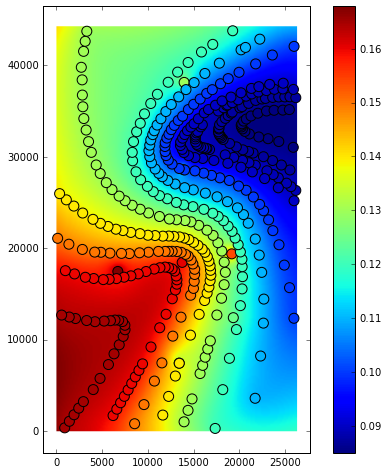

In [70]:
# Set up a regular grid of interpolation points
i, j = np.linspace(0, Xfeet, NX), np.linspace(0, Yfeet, NY)
i, j = np.meshgrid(i, j)

rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
#rbf = scipy.interpolate.Rbf(x, y, z, function='inverse', epsilon=1000)
zi = rbf(i, j)

plt.figure(figsize=(8,8))
plt.imshow(zi, vmin=zi.min(), vmax=zi.max(), origin='lower',extent=[0, Xfeet, 0, Yfeet], cmap='jet')
plt.scatter(x, y, c=z, s=100, cmap='jet')

plt.colorbar()


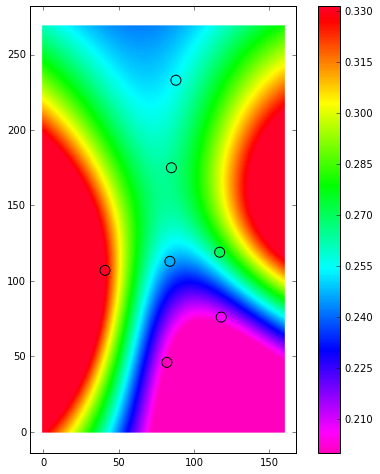

In [37]:
D1=poro[poro.z==6]
x=D1.i
y=D1.j
z=D1.poro/100

# Set up a regular grid of interpolation points
i, j = np.linspace(0, NX, NX), np.linspace(0, NY, NY)
#i, j = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
i, j = np.meshgrid(i, j)

# Interpolate
#rbf = scipy.interpolate.Rbf(x, y, z, function='thin_plate')
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse', epsilon=150)
#rbf = scipy.interpolate.Rbf(x, y, z, function='gaussian', epsilon=100)
zi = rbf(i, j)

plt.figure(figsize=(8,8))
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower', cmap='gist_rainbow_r')
#plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z, s=100, cmap='gist_rainbow_r')
plt.colorbar()


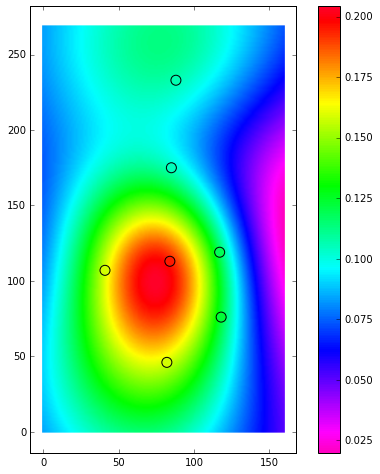

In [53]:
D1=poro[poro.z==2]
x=D1.i
y=D1.j
z=D1.poro/100

# Set up a regular grid of interpolation points
i, j = np.linspace(0, NX, NX), np.linspace(0, NY, NY)
#i, j = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
i, j = np.meshgrid(i, j)

# Interpolate
#rbf = scipy.interpolate.Rbf(x, y, z, function='thin_plate')
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse', epsilon=100)
#rbf = scipy.interpolate.Rbf(x, y, z, function='gaussian', epsilon=100)
zi = rbf(i, j)

plt.figure(figsize=(8,8))
plt.imshow(zi, cmap='gist_rainbow_r')
plt.scatter(x, y, c=z, s=100, cmap='gist_rainbow_r', vmin=zi.min(), vmax=zi.max())
plt.colorbar()
plt.gca().invert_yaxis()

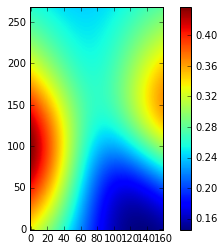

In [38]:
plt.imshow(zi)
plt.gca().invert_yaxis()
plt.colorbar()

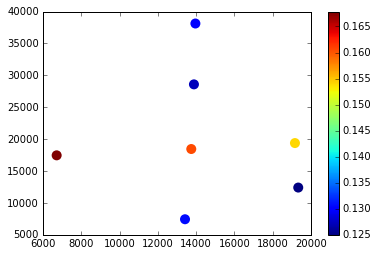

In [11]:
plt.scatter(x, y,c=z, s=100, edgecolors='none')
plt.colorbar()

In [12]:
# Set up a regular grid of interpolation points
i, j = np.linspace(0, Xfeet, NX), np.linspace(0, Yfeet, NY)
i, j = np.meshgrid(i, j)
# Set up a regular grid of interpolation points
#i, j = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
#i, j = np.meshgrid(i, j)

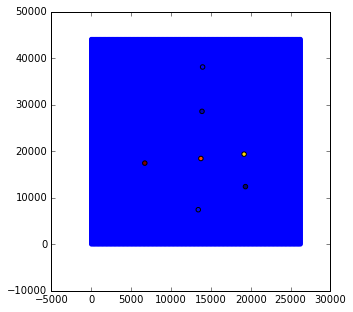

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(i, j, edgecolors='none')
plt.scatter(x, y, c=z)

In [14]:
# Interpolate
#rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse')
zi = rbf(i, j)

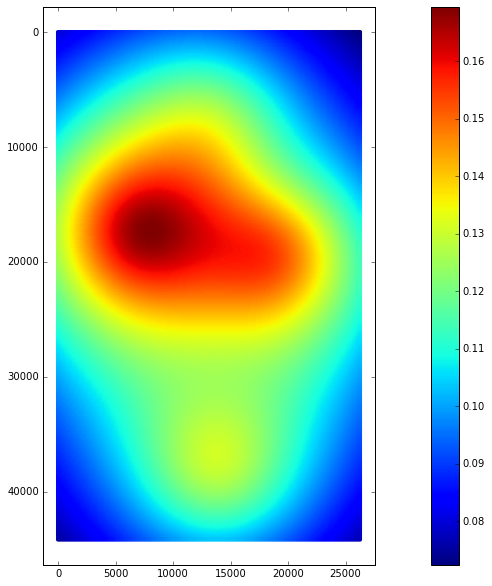

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(zi)
#plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(i, j, c=zi, edgecolors='none')

plt.colorbar()
